## Пятая лабораторная работа

The task:

`Выполнить сравнительный анализ работы алгоритмов по поиску подстроки в строке (Наивный метод, Алгоритм Бойера-Мура, Алгоритм Рабина-Карпа, Алгоритм Кнута-Морриса-Пратта)`

### `NAIVE` method

In [3]:
def naive_pattern_search(pattern: str, text: str):
    m = len(pattern)
    n = len(text)
    match_indexes = []
    for i in range(n - m + 1):
        j = 0
        while j < m and text[i + j] == pattern[j]:
            j += 1
        if j == m:
            # print(f"Pattern found at index {i}")
            match_indexes.append(i)

    return match_indexes

In [21]:
s = 'aboba000aboba'
t = 'aboba'
print(naive_pattern_search(t, s))

[0, 8]


### `BOYER-MOORE` method

In [96]:
# Function to precompute bad character table
def preBadChar(t, m):
	# Initialize an array to store bad character position
	badChar = [-1]*256

	# Fill the array with the last occurrence of each character in t
	for i in range(m):
		badChar[ord(t[i])] = i

	return badChar

# Function to remove all occurrences of t in s
def removeOccurrences(s, t):
	m = len(t)
	n = len(s)
	
	match_indexes = []
	
	# Precompute the bad character table
	badChar = preBadChar(t, m)
	multiplier = 0
	i = 0
	while i <= n - m:
		j = m - 1

		# Compare characters from right to left
		while j >= 0 and t[j] == s[i+j]:
			j -= 1

		if j < 0:
			# If pattern is found, remove it from s\
			# print('before', s)
			s = s[:i] + s[i+m:]
			# print('after', s)
			match_indexes.append(multiplier*m + i)
			multiplier += 1
			
			n = len(s)
			i += m
		else:
			# Shift the pattern so that bad character aligns
			i += max(1, j - badChar[ord(s[i+j])])


	return s, match_indexes

def bayer_moore(pattern, text):
    s, match_indexes = removeOccurrences(text, pattern)
    return s, match_indexes

In [98]:
# Driver code
s = "abobaIloveBobaboba"
t = "aboba"

# Function call
s, match_indexes = bayer_moore(t, s)
print(match_indexes)


[0, 13]


### `RABIN-KARP` method

In [72]:
chr(259)

'ă'

In [99]:

# d is the number of characters in the input alphabet
d = 256

def hash_value(x, multiplier, q=101):
    # q = 101 # some prime number for hash function
    return (d*multiplier + ord(x)) % q

# Search the pat string in the txt string
def rabin_karp_search(pat, txt, q=101):
    M = len(pat)
    N = len(txt)
    i = 0
    j = 0
    p = 0    # hash value for pattern
    t = 0    # hash value for txt
    h = 1

    match_indexes = []
    # The value of h would be "pow(d, M-1)%q"
    for i in range(M-1):
        h = (h*d) % q

    # Calculate the hash value of pattern and first window
    # of text
    for i in range(M):
        p = hash_value(pat[i], p) 
        t =  hash_value(txt[i], t)

    # Slide the pattern over text one by one
    for i in range(N-M+1):
        # Check the hash values of current window of text and
        # pattern if the hash values match then only check
        # for characters one by one
        if p == t:
            # Check for characters one by one
            for j in range(M):
                if txt[i+j] != pat[j]:
                    break
                else:
                    j += 1

            # if p == t and pat[0...M-1] = txt[i, i+1, ...i+M-1]
            if j == M:
                # print("Pattern found at index " + str(i))
                match_indexes.append(i)
        # Calculate hash value for next window of text: Remove
        # leading digit, add trailing digit
        if i < N-M:
            t = (d*(t-ord(txt[i])*h) + ord(txt[i+M])) % q

            # We might get negative values of t, converting it to
            # positive
            if t < 0:
                t = t+q
                
    return match_indexes

In [100]:
s = "abobaIloveBobaboba"
t = "aboba"

# A prime number

    # Function Call
indexes = rabin_karp_search(t, s)
indexes

[0, 13]

### `Knuth-Morris-Pratt` method

In [101]:
def KMPSearch(pattern, text):
    # Create LPS array
    lps = computeLPSArray(pattern)
    i = 0  # index for text
    j = 0  # index for pattern
    
    match_indexes = []
    while i < len(text):
        if pattern[j] == text[i]:
            i += 1
            j += 1
            
        if j == len(pattern):
            # print("Pattern found at index " + str(i - j))
            match_indexes.append(i - j)
            j = lps[j - 1]
        elif i < len(text) and pattern[j] != text[i]:
            if j != 0:
                j = lps[j - 1]
            else:
                i += 1
    return match_indexes

def computeLPSArray(pattern):
    length = 0  # length of previous longest prefix suffix
    lps = [0] * len(pattern)
    i = 1

    while i < len(pattern):
        if pattern[i] == pattern[length]:
            length += 1
            lps[i] = length
            i += 1
        else:
            if length != 0:
                length = lps[length - 1]
            else:
                lps[i] = 0
                i += 1

    return lps

In [103]:
s = "abobaIloveBobaboba"
t = "aboba"

# A prime number

    # Function Call
indexes = KMPSearch(t, s)
indexes

[0, 13]

### Time Comparison Analysis

In [156]:
pattern = 'Ilovesushi'
text = (pattern + 'Ihatesushi_Iwannabuyacar123' + pattern + 'IwannamovetoUSsooooo' + pattern + 'badlyferfrefefpomni')

lengths_multiplier = range(1, 1_000, 50)

patterns = [pattern]*len(lengths_multiplier)
texts = [multiplier*text for multiplier in lengths_multiplier]
# texts

In [157]:
text1 = "A" * 100_000 + "B"
pattern1 = "A" * 100 + "B"

import random

text2 = ''.join(random.choices("ACGT", k=100_000))
pattern2 = "ACGTACGTAC"


text3 = (
    "Lorem ipsum dolor sit amet, consectetur adipiscing elit. " * 1000
)
pattern3 = "consectetur adipiscing"


text4 = "x" * 99_990 + "patternMATCH"
pattern4 = "patternMATCH"


text5 = ''.join(random.choices("ABCDEFGHIJKLMNOPQRSTUVWXYZ", k=100_000))
pattern5 = "notinthetext"

for p, t in [[pattern1, text1], [pattern2, text2], [pattern3, text3], [pattern4, text4], [pattern5, text5]]:
    patterns.append(p)
    texts.append(t)

print(patterns)
    

['Ilovesushi', 'Ilovesushi', 'Ilovesushi', 'Ilovesushi', 'Ilovesushi', 'Ilovesushi', 'Ilovesushi', 'Ilovesushi', 'Ilovesushi', 'Ilovesushi', 'Ilovesushi', 'Ilovesushi', 'Ilovesushi', 'Ilovesushi', 'Ilovesushi', 'Ilovesushi', 'Ilovesushi', 'Ilovesushi', 'Ilovesushi', 'Ilovesushi', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB', 'ACGTACGTAC', 'consectetur adipiscing', 'patternMATCH', 'notinthetext']


In [158]:
import time

def get_execution_time(text: str, pattern: str, method: callable) -> list:
    '''
    Returns the execution time of a method for different n values.
    Parameters:
        method(callable): method to be executed

    Returns:
        list: list of execution time values for each n value
    '''
    time_values = []
    print('----------------------')
    print('Method: ', method.__name__)
    # for text in texts:
    st = time.time()
    res = method(pattern, text)
    end = time.time()

    time_values.append(end-st)
    
    return time_values



In [151]:
time_values

[[0.0]]

In [160]:
texts_lengths = [len(text) for text in texts]


In [161]:
texts_lengths

[96,
 4896,
 9696,
 14496,
 19296,
 24096,
 28896,
 33696,
 38496,
 43296,
 48096,
 52896,
 57696,
 62496,
 67296,
 72096,
 76896,
 81696,
 86496,
 91296,
 100001,
 100000,
 57000,
 100002,
 100000]

In [165]:
len(patterns)

25

In [167]:
len(time_values)

4

In [168]:
import matplotlib.pyplot as plt

time_values = []
# texts = [text1, text2, text3, text4, text5]
# patterns = [pattern1, pattern2, pattern3, pattern4, pattern5]

# plt.figure(figsize=(10, 5))
for i, method in enumerate([naive_pattern_search, bayer_moore, rabin_karp_search, KMPSearch]):
    time_values.append(get_execution_time(texts[i], patterns[i], method))
    
    # plt.plot(texts_lengths, time_values, label=method.__name__)

# plt.legend()
# plt.ylabel('Execution TIME')
# plt.xlabel('texts LENGTHS')
# plt.show()

----------------------
Method:  naive_pattern_search
----------------------
Method:  bayer_moore
----------------------
Method:  rabin_karp_search
----------------------
Method:  KMPSearch


In [137]:
time_values

[[1.2440221309661865],
 [0.021681785583496094],
 [0.022523880004882812],
 [0.03193473815917969]]

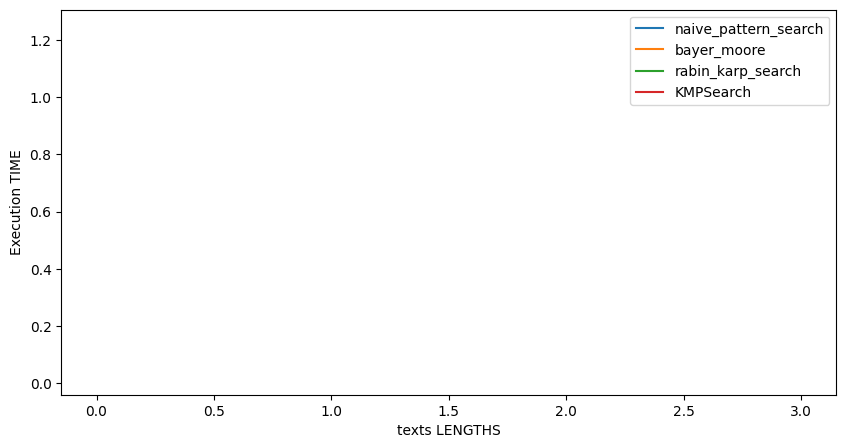

In [ ]:
plt.figure(figsize=(10, 5))
for i, method in enumerate([naive_pattern_search, bayer_moore, rabin_karp_search, KMPSearch]):
    # time_values.append(get_execution_time(texts[i], patterns[i], method))
    
    plt.plot(i, time_values, label=method.__name__)

plt.legend()
plt.ylabel('Execution TIME')
plt.xlabel('texts LENGTHS')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (5,) and (1,)

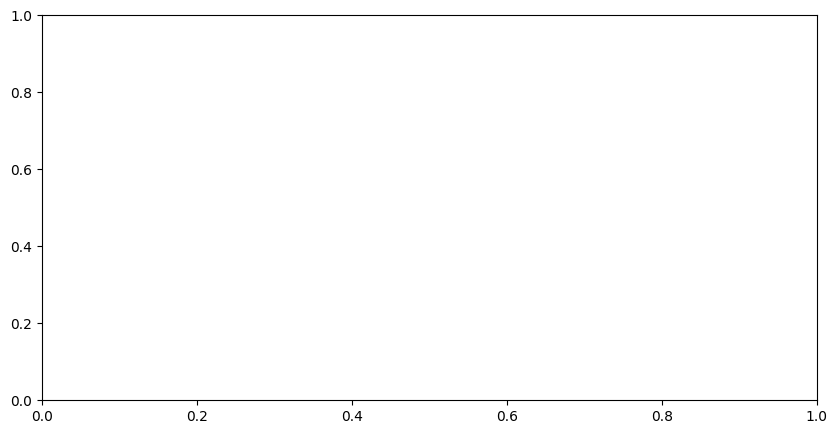

In [ ]:
for i, method in enumerate([naive_pattern_search, bayer_moore, rabin_karp_search, KMPSearch]):
    plt.plot([len(text) for text in texts], time_values[i], label=method.__name__)
    
plt.legend()
plt.ylabel('Execution TIME')
plt.xlabel('texts LENGTHS')
plt.show()

In [122]:
import random

text2 = ''.join(random.choices("ACGT", k=100_000))
pattern2 = "ACGTACGTAC"


In [123]:
len(text2)

100000